## Library Imports

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setting seed for reproducibility
np.random.seed(42)

## Load Dataset

In [68]:
# Removing Samples where data had to be discarded due to some collection errors.
remove = ['P1', 'P11','P2', 'P22', 'P25', 'P37', 'P4', 'P47', 'P48', 'P49','P50', 'P54', 'P56', 'P59','P16', 'P24', 'P67', 'P68', 'P72','P74','P75','P30','P51','P58']

# Load Spiro Data
data = np.load('../3.Feature_Engineering/1.Dataset/Autoclip_3000_5000_N95_FEATURES.npy',allow_pickle=True)
data = data[~np.isin(data[:,0],remove)]

# Bifurcate into X and y
X = pd.DataFrame(data[:,1:-2],dtype=float)
y_FEV1= pd.DataFrame(data[:,-2],dtype=float)
y_FVC = pd.DataFrame(data[:,-1],dtype=float)

print(X.shape,y_FEV1.shape,y_FVC.shape)

(47, 710) (47, 1) (47, 1)


## Random Forest Trainer Function

In [48]:
def train_RF(RF,X,y):
        
    # Total number of the splits
    tot = len(X)
    
    # Instantiating Leave_One_Out split function.
    loo = LeaveOneOut()

    prog        = 0     # Progress counter
    y_GT        = []    # Ground truth
    y_PT        = []    # Predicted value

    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("Training Random Forest Regressor")

    # For every split obtained by Leave_One_Out split function.
    for i,(train_index, test_index) in enumerate(loo.split(X)):
        
        # To show some sort of progress.
        prog = prog + 1
        print("\tLOOCV Fold no  : {0}/{1}".format(prog,tot),end = '\r')

        # Test-train split for the fold.
        X_Train, X_Test = X.iloc[train_index],X.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index],y.iloc[test_index]
        
        # Training new Random Forest ensemble.
        RF.fit(X_Train, np.ravel(y_Train))
        pred = RF.predict(X_Test)  

        # Storing the values of Ground truth and Predicted value for future use.
        y_GT.append(y_Test.iloc[0,0])
        y_PT.append(pred[0]) 


    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
    print("\tRandom forest metrics : ")
    print("\t\tMean Absolute Percentage Error : " , 100 * mean_absolute_percentage_error(y_GT,y_PT))
    print("\t\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
    print("\t\tMean Square Error : " , mean_squared_error(y_GT,y_PT,squared=False))
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")

    y_err = abs(np.array(y_GT) - np.array(y_PT))/np.array(y_GT)

    return y_err

# FEV1

In [70]:
# Instantiating Random forest Regressor.
RF = RandomForestRegressor( n_jobs=-1, bootstrap=True, criterion='absolute_error', 
                                  n_estimators=100,  max_features=1.0, max_depth=None,  
                                  min_samples_leaf=1, min_samples_split=2 ,random_state=42)

y_err_FEV1 =  train_RF(RF,X,y_FEV1)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Training Random Forest Regressor
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
	Random forest metrics : 
		Mean Absolute Percentage Error :  4.963364118728548
		Mean Aabsolute Error :  0.1523063829787234
		Mean Square Error :  0.19845407636411003
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=


# FVC

In [69]:
# Instantiating Random forrest Regressor.
RF = RandomForestRegressor( n_jobs=-1, bootstrap=True, criterion='squared_error',
                                  n_estimators=100,  max_features=1.0, max_depth=None,  
                                  min_samples_leaf=1, min_samples_split=2 ,random_state=42)

y_err_FVC =  train_RF(RF,X,y_FVC)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Training Random Forest Regressor
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
	Random forest metrics : 
		Mean Absolute Percentage Error :  4.985851330201179
		Mean Aabsolute Error :  0.16422340425531906
		Mean Square Error :  0.21568861667158518
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=


## Visualize the errors in the predictions

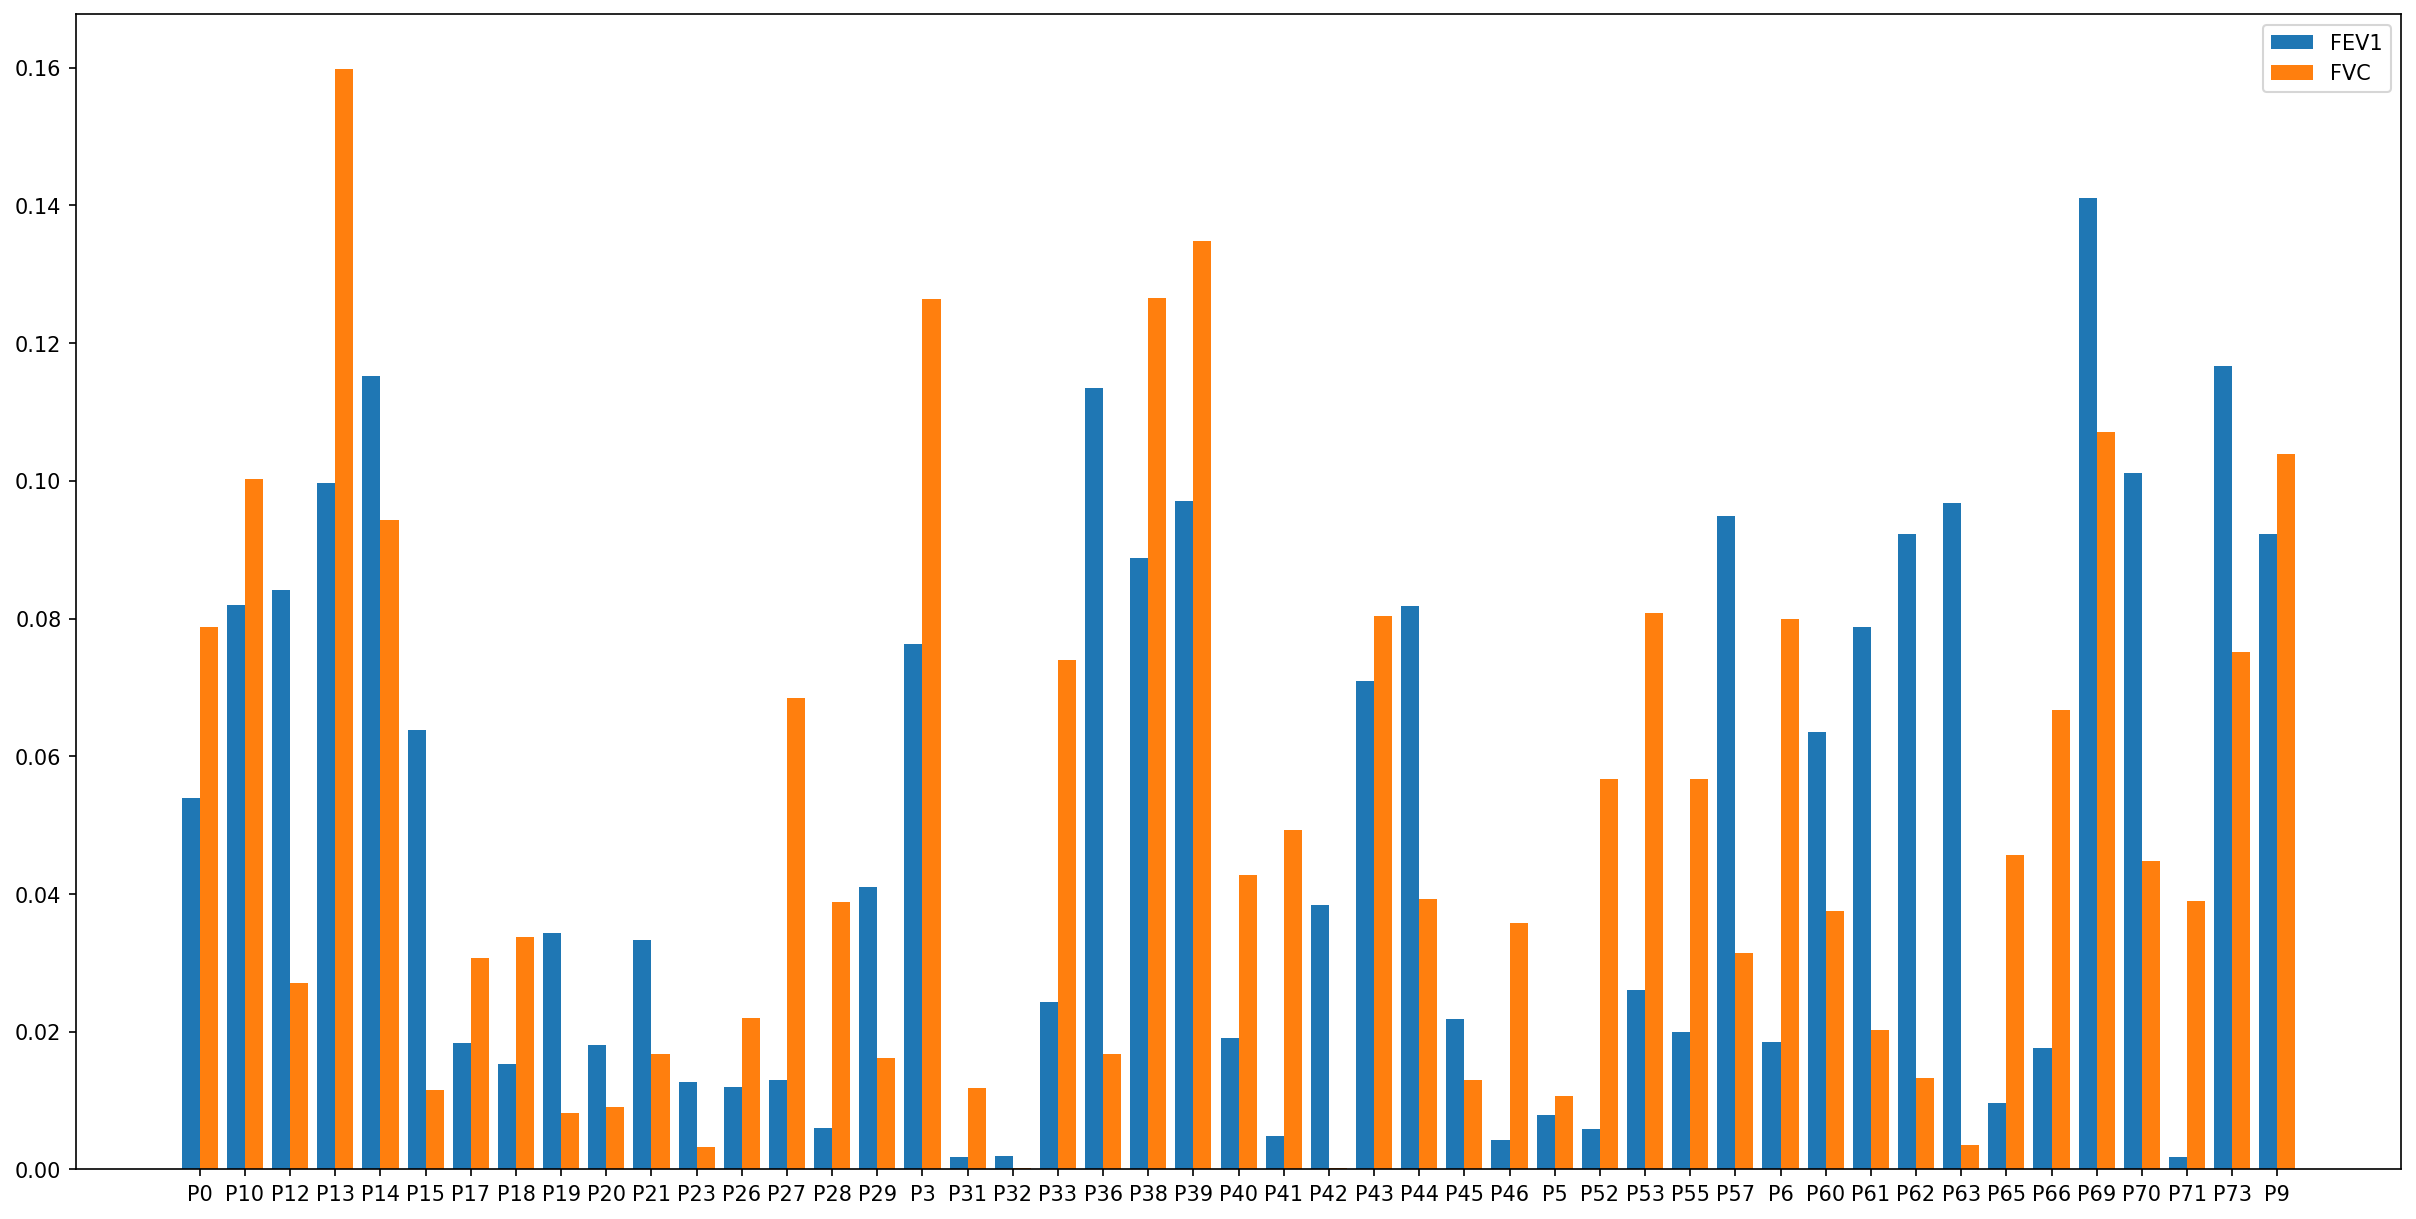

In [71]:
plt.figure(figsize=(20,10),dpi=150)
plt.bar([i-0.2 for i in range(len(y_err_FEV1))],y_err_FEV1,width=0.4,label='FEV1')
plt.bar([i+0.2 for i in range(len(y_err_FVC))],y_err_FVC,width=0.4,label='FVC')
plt.xticks([i for i in range(len(y_err_FVC))],[data[i][0] for i in range(len(y_err_FEV1))])
plt.legend()
plt.show()